## Import modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

## Import Dataset

In [2]:
pd.read_csv(r"C:\Users\durga\OneDrive\Documents\python class ML\pima-indians-diabetes.data (2).csv")

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
filename = r"C:\Users\durga\OneDrive\Documents\python class ML\pima-indians-diabetes.data (2).csv"
col_names = [ 'Pregnancies', 'Glucose', 'BP', 'SkinThichness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome' ]

d1 = pd.read_csv(filename,names = col_names)
print(d1)

     Pregnancies  Glucose  BP  SkinThichness  Insulin   BMI  \
0              6      148  72             35        0  33.6   
1              1       85  66             29        0  26.6   
2              8      183  64              0        0  23.3   
3              1       89  66             23       94  28.1   
4              0      137  40             35      168  43.1   
..           ...      ...  ..            ...      ...   ...   
763           10      101  76             48      180  32.9   
764            2      122  70             27        0  36.8   
765            5      121  72             23      112  26.2   
766            1      126  60              0        0  30.1   
767            1       93  70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4            

In [4]:
d1

,Pregnancies,Glucose,BP,SkinThichness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
d1.shape

(768, 9)

In [6]:
d1.head(10)

,Pregnancies,Glucose,BP,SkinThichness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
d1.tail(10)

,Pregnancies,Glucose,BP,SkinThichness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
d1.isnull().sum() #finding null values

Pregnancies                 0
Glucose                     0
BP                          0
SkinThichness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
d1.info() # to know all the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BP                        768 non-null    int64  
 3   SkinThichness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
d1.describe() #to know the all stastical data

,Pregnancies,Glucose,BP,SkinThichness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
array = d1.values
print(array)

x = array[:,0:-1]
y = array[:,-1]

x

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [13]:
d1['Outcome'].value_counts() # to check data is balanced or not

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
x = (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)) ##scalling
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Data Validation

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [16]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [17]:
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       153
         1.0       0.67      0.44      0.53        78

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



## Evaluation matrix

In [19]:
accuracy_score(y_test,y_pred)

0.7359307359307359

In [20]:
n_neighbors = [2*i+1 for i in range (0,27)]
print(n_neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53]


In [21]:
acc_result = []     
f1_result = []   
for i in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print("acc=", acc)
    acc_result.append(acc)
    f1 = f1_score(y_test,y_pred)
    f1_result.append(f1)
    print(classification_report(y_test,y_pred),i)

acc= 0.6753246753246753
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       153
         1.0       0.52      0.54      0.53        78

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.68      0.68      0.68       231
 1
acc= 0.7445887445887446
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       153
         1.0       0.63      0.59      0.61        78

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231
 3
acc= 0.7575757575757576
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       153
         1.0       0.65      0.62      0.63        78

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       23

In [22]:
acc_result

[0.6753246753246753,
 0.7445887445887446,
 0.7575757575757576,
 0.7272727272727273,
 0.7272727272727273,
 0.7359307359307359,
 0.7445887445887446,
 0.7359307359307359,
 0.7445887445887446,
 0.7532467532467533,
 0.7402597402597403,
 0.7316017316017316,
 0.7402597402597403,
 0.7359307359307359,
 0.7532467532467533,
 0.7489177489177489,
 0.7445887445887446,
 0.7316017316017316,
 0.7229437229437229,
 0.7316017316017316,
 0.7359307359307359,
 0.7445887445887446,
 0.7445887445887446,
 0.7489177489177489,
 0.7532467532467533,
 0.7532467532467533,
 0.7532467532467533]

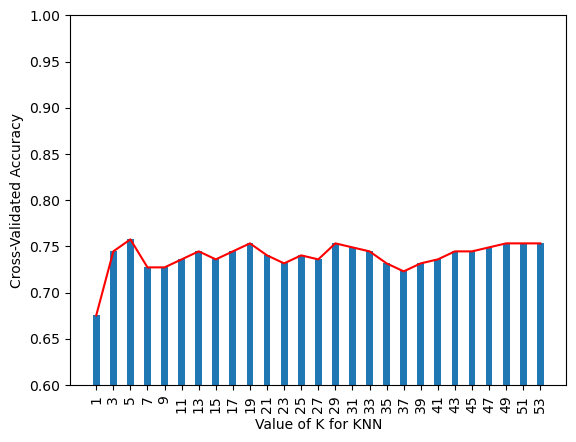

In [23]:
## acc result visualization
import matplotlib.pyplot as plt
k_range = [2*i+1 for i in range(0,27)]
plt.bar(k_range,acc_result)
plt.plot(k_range,acc_result,color = 'red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range,rotation = 90)
plt.ylim(0.6,1)
plt.show()

In [24]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()